<a href="https://colab.research.google.com/github/Chanakarn06/DWDM21/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **สมาชิก**
ชื่อกลุ่ม : Natasha Romanoff

1.623020514-5 จุฑากาญจน์ ชิงจันทร์

2.623021047-5 ฐิติวัฒน์ จันทรเสนา

3.623021042-5 ขนิษฐา ภูโสภา

4.623021043-3 จิตติยา ศิริธรรมจักร

5.623021046-7 ชนกานต์ พูลผล

#**DATA**

## แหล่งข้อมูล
**1** การนำเข้าปุ๋ยเคมี (รายประเทศ)\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**2** การนำเข้าเมล็ดพันธุ์ควบคุม (รายประเทศ)\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**3** สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง\
องค์กร : ศูนย์เทคโนโลยีสารสนเทศและการสื่อสาร กรมวิชาการเกษตร
จาก : https://data.go.th

**4** ข้อมูลทั่วไปของประเทศที่นำเข้าสินค้าทางการเกษตร



File for this project : https://drive.google.com/drive/folders/1PCwak7QUVizd6sfY-NvAZBRLNh5N-fhz?usp=sharing

# วัตถุประสงค์
เพื่อทำนายว่าจำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรหรือไม่ โดยจะจัดกลุ่มปริมาณการนำเข้าสินค้าให้อยู่ในกลุ่มน้อย หรือกลุ่มมาก

### ตารางข้อมูลทั้งหมด 4 ตาราง นั้นคือ 

1. การนำเข้าปุ๋ยเคมี (รายประเทศ)
> มี 19 attibute 
2. การนำเข้าเมล็ดพันธุ์ควบคุม (รายประเทศ)
> มี 21 attibute 
3. สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง
> มี 20 attibute 
4. ข้อมูลทั่วไปของประเทศที่นำเข้าสินค้าทางการเกษตร
> มี 9 attibute 

### การเชื่อมไดร์ฟเพื่อดึงข้อมูลจากไดร์ฟ

In [ ]:
import pandas as pd #เพื่อใช้ทำงานกับข้อมูลที่เป็นรูปแบบตาราง
import os           #เพื่อจัดการกับไฟล์ และ ตัว path ที่เราจะนำเข้า

In [ ]:
from google.colab import drive#เชื่อมข้อมูล เพราะเราจะทำการนำเข้าข้อมูล โดยให้ดึงมาจาก google drive ของเรา
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/My Drive/Project'#โดยเราจะทำการระบุให้ชี้ไปที่ โฟนเดอร์ที่เราเซฟไฟล์ไว้ หรือก็คือ โฟนเดอร์ Project

#**Preprocessing**

##**ตารางที่ 1 ตาราง ปริมาณการนำเข้าปุ๋ยเคมี**

In [ ]:
data_fc = pd.read_csv(os.path.join(path,'ปริมาณการนำเข้าปุ๋ยเคมี.csv'))
data_fc #การนำเข้าไฟล์ที่มีตัวแปรคือdata_fc

In [ ]:
data_fc.shape #.shape ใช้ข้อมูลว่า array นั้นมีสมาชิกกี่ตัว กี่แถว กี่คอลัมน์ กี่ตาราง ซึ่ง data_fc มี34แถว 20 คอลัมน์ 
#แต่เมื่อตรวจสอบที่ไฟล์ต้นททางพบว่า แถวและคอลัมน์ที่ขึ้น แนน เป็นส่วนที่ไม่ได้ใช้ดังนั้นต้องทำการตัดคอลัมน์ที่ 20 ออก และแถว32-33

###**ตัดคอลัมน์ที่ 20 ออก**
โดยการใช้ .iloc ให้ตัดคอลัมน์มาแค่คอลัมน์ 0-18

In [ ]:
data_fcUSE = data_fc.iloc[:,:19]
data_fcUSE

###**ตัดแถว 32-33**
โดยการใช้ .dropna ซึ่งจะใช้ตัดแถวข้อมูลที่มีค่า missing

In [ ]:
data_FC = data_fcUSE.dropna() #ใช้ dropna เพื่อต้องการลบข้อมูลทั้งแถวออกเมื่อมีคอลัมน์ใดคอลัมน์หนึ่งเป็น NaN
data_FC

In [ ]:
data_FC.shape #ตรวจสอบขนาดของตารางใหม่

In [ ]:
data_FC.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่
#ไม่ม่ค่าว่างอยู่

##**ตารางที่ 2 ตาราง ปริมาณการนำเข้าเมล็ดพันธุ์**

In [ ]:
data_pc = pd.read_csv(os.path.join(path,'ปริมาณการนำเข้าเมล็ดพันธุ์.csv')) #การนำเข้าไฟล์ที่มีตัวแปรคือdata_pc
data_pc

In [ ]:
data_pc.shape

##**ตารางที่ 3 ตาราง สารป้องกันและกำจัดโรคพืช**

In [ ]:
data_pd = pd.read_csv(os.path.join(path,'สารป้องกันและกำจัดโรคพืช.csv')) #การนำเข้าไฟล์ที่มีตัวแปรคือdata_pd
data_pd

In [ ]:
data_pd.shape
#ข้อมูลมีค่า NaN แต่เมื่อตรวจสอบที่ไฟล์ต้นททางพบว่า แถวและคอลัมน์ที่ขึ้น NaN เป็นส่วนที่ไม่ได้ใช้ดังนั้นต้องทำการตัดคอลัมน์ที่ 9 ออก

####**รวมตารางครั้งที่ 1**

In [ ]:
merged_data_FC_data_pc = data_FC.merge(data_pc,how='left',left_on='Subtitle_FC',right_on='Subtitle_PC')
merged_data_FC_data_pc #ใช้ merged เป็นการเชื่อมตาราง data_FC และ data_pc ในแนวแกนX

####**รวมตารางครั้งที่ 2**

In [ ]:
merged_03 = data_pd.merge(merged_data_FC_data_pc,how='left',left_on='Subtitle_PD',right_on='Subtitle_PC')
merged_03
#ใช้merged_03 เพื่อเชื่อมตารางเข้าด้วยกัน

จากข้อมูลของตารางเบื้องต้น จะเห็นว่า มีข้อมูลที่เป็น NaN หรือ Not a Number เป็นจำนวนมาก ดังนั้นต้องทำการกำจัดค่า Missing value

In [ ]:
merged_03.shape #.shape ใช้ข้อมูลว่า array นั้นมีสมาชิกกี่ตัว กี่แถว กี่คอลัมน์ กี่ตาราง ซึ่ง ตาราง merged_03 มี32 แถว 49 คอลัมน์

In [ ]:
merged_03.dropna().shape 
#ใช้ dropna เพื่อต้องการลบข้อมูลทั้งแถวออกเมื่อมีคอลัมน์ใดคอลัมน์หนึ่งเป็น NaN และใช้ .shape  เพื่อตรวจสอบว่ามี NAN กี่แถว กี่คอลัมน์

In [ ]:
merged_03.dropna().shape[0] 

คำนวณข้อมูลว่าหายไปกี่เปอร์เซ็น

In [ ]:
removes = merged_03.shape[0] - merged_03.dropna().shape[0]
print(f'size before drop = {merged_03.shape[0]}')
print(f'size after drop = {merged_03.dropna().shape[0]}')
print(f'we lost {100*(removes/merged_03.shape[0])}% of data') #จากการคำนวณพบว่ามีข้อมูลที่หายไปถึง 0%

จากการหาเปอร์เซ็นของข้อมูลที่โดนตัดไปจากการกำจัด Missing โดยการ dropna พบว่ามีข้อมูลหายไป 0% ซึ่งสมควรสามารถใช้วิธีนี้ได้ 

นอกจากนี้ ถ้าเกิดปัญหามีค่า Missing จากการพิจารณา Handle Missing Value แล้วพบว่า ข้อมูลของเราเป็น Numeric ดังนั้นต้องแทนค่าด้วยค่ากลาง(mean)

In [ ]:
merged_03.mean() #หาค่ามีนทั้งหมด

**ทดลอง**
ถ้าสนใจคอลัมน์ ปี 2016 2017 และ2018

In [ ]:
merged_03[['Y2016_x']].mean()
#เติมมีนลงไปแทนค่า missing
#เราสามารถใช้ data.mean() ได้เพื่อหาค่ามีนทั้งหมดแต่จะนาน ดังนี้ชี้แค่ส่วนที่เราสนใจ

In [ ]:
avg_age1=merged_03[['Y2016_x']].mean()
merged_03[['Y2016_x']] = merged_03[['Y2016_x']].fillna('Y2016_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [ ]:
avg_age2=merged_03[['Y2017_x']].mean()
merged_03[['Y2017_x']] = merged_03[['Y2017_x']].fillna('Y2017_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [ ]:
avg_age2=merged_03[['Y2018_x']].mean()
merged_03[['Y2018_x']] = merged_03[['Y2018_x']].fillna('Y2018_x')#ใช้ fillna เพื่อแทนค่าของ missing

In [ ]:
merged_03.isnull().any()

##**ตารางที่ 4 ตาราง ข้อมูลทั่วไปนำเข้าสินค้าทางเกษตร**
หาข้อมูลเพิ่ม

In [ ]:
path = '/content/drive/My Drive/Project'#โดยเราจะทำการระบุให้ชี้ไปที่ โฟนเดอร์ที่เราเซฟไฟล์ไว้ หรือก็คือ โฟนเดอร์ Project

In [ ]:
data_add = pd.read_csv(os.path.join(path,'ข้อมูลทั่วไปนำเข้าสินค้าทางเกษตร.csv'))
data_add

In [ ]:
data_ADD = data_add.iloc[:,:9]
data_ADD

####**รวมตารางครั้งที่ 3**

In [ ]:
merged_04 = data_ADD.merge(merged_03,how='left',left_on='country',right_on='Subtitle_PD') 
merged_04
#add table that about coutry anothor

In [ ]:
removes = merged_04.shape[0] - merged_04.dropna().shape[0]
print(f'size before drop = {merged_04.shape[0]}')
print(f'size after drop = {merged_04.dropna().shape[0]}')
 #จากการคำนวณพบว่ามีข้อมูลที่หายไปถึง 0%

#**Classitication**
ปัญหาของเราคือ เราสินค้าทางการเกษตรในประเทศของเราไม่เพียงพอ เราเลยอยากรู้ว่าในปีถัดไปเราควรสั่งสินค้าจากประเทศบ้าง โดยเราจะพิจารณาจากปริมาณการนำเข้า 3 ปีย้อนหลัง คือ 2018 2019 2020 นอกจากนี้เราอยากรู้อีกว่ามีปัจจัยใดบ้างที่ส่งผลต่อการผลิตสินค้าทางการเกษตรของประเทศที่เรานำเข้า ซึ่งเรามีปัจจัยที่คาดว่าจะเกี่ยวข้องคือ จำนวนประชากร ค่าเเรงโดยเฉลี่ย และค่าครองชีพโดยเฉลี่ย
    ดังนั้น เราจึงได้ทำการวิเคราะห์ Data mining เพื่อทำนายว่าจำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรหรือไม่ โดยจะจัดกลุ่มปริมาณการนำเข้าสินค้าให้อยู่ในกลุ่มน้อย หรือกลุ่มมาก 

แต่ข้อมูลของเรายังไม่พร้อมใช้งาน เพราะเราต้องการดูผลรวมของจำนวนการนำเข้าสินค้าทางการเกษตรแต่ล่ะประเทศดังนั้น ต้องสร้างคอลัมน์รวม

###**สร้างคอลัมน์ผลรวม**

In [ ]:
merged_04['PD_total'] = merged_04.Y2018+merged_04.Y2019_x+merged_04.Y2020_x
merged_04

In [ ]:
merged_04['PD_total'] = merged_04.Y2007+merged_04.Y2008+merged_04.Y2009+merged_04.Y2010+merged_04.Y2011+merged_04.Y2012+merged_04.Y2013+merged_04.Y2014+merged_04.Y2015+merged_04.Y2016+merged_04.Y2017+merged_04.Y2018+merged_04.Y2019_x+merged_04.Y2020_x
merged_04

In [ ]:
merged_04['PC_total'] = merged_04.Y2018_y+merged_04.Y2019_y+merged_04.Y2020_y
merged_04

In [ ]:
merged_04['FC_total'] = merged_04.Y2018_x
merged_04

In [ ]:
merged_04['total'] = merged_04.FC_total+merged_04.PD_total+merged_04.PC_total
merged_04

###**สร้างตารางที่มีแต่คอลัมน์ที่จะใช้**

In [ ]:
data1 = merged_04[['country','total']]
data1

In [ ]:
data1.shape #ได้ว่าข้อมูลนี้มี 32 แถว 2 คอลัม

In [ ]:
data1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จะเห็นว่าคอลัมน์ total มีค่าว่าง

In [ ]:
data1= data1.dropna()  
#เนื่องจากข้อมูลของเราในปีที่นำมาจังหวัดบึงกาฬยังไม่แยกตัวออกมา เราจึงเลือกที่จะจัดการกับค่าว่างโดยการดรอป

In [ ]:
data1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จะเห็นว่าคอลัมน์ total ไม่มีค่าว่างแล้ว

In [ ]:
data1.shape #ได้ว่าข้อมูลนี้มี 29 แถว 2 คอลัม

In [ ]:
from sklearn.cluster import KMeans #นำเข้าฟังก์ชัน kmeans เพื่อใช้ในการจัดกลุ่ม

In [ ]:
Xd = data1[['total']] #Xd คือตัวแปรของปริมาณการนำเข้าสินค้าทางการเกษตร
#ให้ตัวแปร Xd เป็นตัวแปรที่แทนคอลัม total 

In [ ]:
from sklearn.datasets import make_blobs #make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

###**Cluster**

In [ ]:
Xd,y=make_blobs(n_samples=29, centers=2, n_features=2, random_state=6)  #230 แถว 2 หลัก จากที่กำหนด n_samples=29 และ n_features=2 จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [ ]:
Xd.shape

In [ ]:
from matplotlib import pyplot as plt #นำเข้า pyplot โดยตั้งชื่อว่า plt นำมาเพื่อพล็อตกราฟ
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xd)

In [ ]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

In [ ]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
n_group = 2 # จำนวนกลุ่ม
n_duplicate = 30 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumagicult = np.random.choice(len(Xd),n_group,replace=0)
X_cend = Xd[sumagicult] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_duplicate):
    distance = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    gruopd = distance.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_group):
        if(len(Xd[gruopd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[gruopd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

In [ ]:
distance = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = distance.argmin(1)
plt.gca(aspect=0.5)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Agricult Product')
plt.xlabel('Agricult Product Score')
plt.legend()
plt.show()
#คือการกำหนดหัวเรื่องเพื่อให้มองชัดขึ้นว่าเรื่องนี้เป็นเรื่องอะไร และมีการกำหนดว่า สีที่ปรากฏหมายถึงค่าของอะไร รวมถึงการทำการกำหนดจุดcentriodด้วย

In [ ]:
ssed = 0
for i in range(n_group):
    ssed += np.sum(distance[zd==i,i])
print(ssed)
#พิจารณาผลรวมของระยะห่างระหว่างจุดข้อมูลไปยังเซนทรอยด์นั้นๆ ซึ่งเรียกว่าผลรวมความคลาดเคลื่อนกำลังสอง (sum of squared errors, SSE)

In [ ]:
KMclust.cluster_centers_ #คือตำแหน่งของจุดเซนทรอยด์ที่ได้มา จะมีขนาดเท่ากับ (จำนวนเซนทรอยด์,จำนวนมิติ)

In [ ]:
KMclust.transform(Xd) # ระยะห่างของแต่ละจุดกับ centroid

In [ ]:
KMclust.labels_ #ผลการแบ่งกลุ่มของข้อมูลที่ใช้เรียนรู้

In [ ]:
Setempy=[] #Setempy เซ็ทว่างของสินค้าทางการเกษตร
for k in range(2, 10):
    m=KMeans(n_clusters=k) 
    m.fit(Xd)
    Setempy.append([k, m.inertia_])
Setempy
#K-Means จะตัดแบ่ง (Partition) วัตถุออกเป็น K กลุ่ม  และแทนค่าแต่ละกลุ่มด้วยค่าเฉลี่ยของกลุ่ม ซึ่งใช้เป็นจุดศูนย์กลาง (centroid) ของกลุ่มในการวัดระยะห่างของข้อมูลในกลุ่มเดียวกัน
#สร้าง ssd เป็นเซตว่าง แล้วกำหนดค่า k ตั้งแต่ 2 ถึง 10 จากนั้นทำการวนลูป for เพื่อหาค่า k means ของแต่ละ k 
#จากผลสรุปได้ว่าตารางนี้ควรจัดกลุ่มเป็น 2 กลุ่ม เนื่องจากมีค่า k means สูงที่สุด

In [ ]:
xyd= np.array(Setempy) #Setempy เซ็ทว่างของสินค้าทางการเกษตร
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

In [ ]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า

จากกราฟด้านบนจะเห็นว่า ค่าK จะเท่ากับ 5 เนื่องจากเป็นมุมที่คมที่สุดของกราฟ ดังนั้นค่าที่ดีที่สุดสำหรับ K คือ 5

In [ ]:
agp=pd.DataFrame(Setempy, columns=['k', 'Setempy']) #agp ตัวแปรของสินค้าทางการเกษตร
agp

In [ ]:
agp['pct_chg']=agp['Setempy'].pct_change() * 100
agp

In [ ]:
plt.plot(agp['k'], agp['Setempy'], linestyle='--', marker='o')
for index, row in agp.iterrows():
    plt.text(row['k']+.02, row['Setempy']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

นำเข้ากลุ่มที่จัดไว้โดยการเพิ่มที่คอลัม cluster

In [ ]:
data1['cluster']=KMclust.labels_
data1.head()

In [ ]:
data1.groupby('cluster').describe().T #ดูรายละเอียดในตารางนี้

In [ ]:
sns.countplot(x='cluster', data=data1) #สร้างกราฟแท่งดูว่าแค่ละกลุ่มมีจำนวนเท่าไหร่ จากรูป

In [ ]:
data1

In [ ]:
data1.groupby('cluster').head().sort_values('cluster')

In [ ]:
data1.rename(columns={'cluster':'C_Agicult'},inplace=True) #เปลี่ยนชื่อจากคอลัม cluster เป็น C_Agicult
data1

>#### **เชื่อมตารางข้อมูลเพื่อวิเคราะห์ระดับ Data mining**

In [ ]:
Data1 = merged_04[['country','population(million)','living expenses(USD)','avg income(USD)']]
Data1

In [ ]:
Data2 = Data1.merge(data1,how='right',left_on='country',right_on='country') #สร้างตัวแปร Data2 มารับการรวมตารางของตาราง Data1 กับ data1 โดยการใช้คอลัม country เป็นคีย์เชื่อมทั้งสองตาราง
Data2

In [74]:
Data = Data2[['C_Agicult','population(million)','living expenses(USD)','avg income(USD)']]
Data#เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,C_Agicult,population(million),living expenses(USD),avg income(USD)
0,0,34.22,952,"4,754"
1,0,"1,400",752,884
2,1,51,"1,154","2,738"
3,0,2,"1,856","4,684"
4,0,30,652,882
5,1,146,424,891
6,1,4.207,"1,326","3,024"
7,0,93,449,250
8,0,5.39,"2,074","6,521"
9,0,36.28,"1,701","3,620"


In [75]:
Data.shape

(29, 4)

In [76]:
Data.dtypes

C_Agicult                int32
population(million)     object
living expenses(USD)    object
avg income(USD)         object
dtype: object

In [77]:
import pandas as pd
import re

In [78]:
#strip values to float type
Datafloat = Data.replace('[^\d.]','', regex=True).astype(float)
Datafloat

,C_Agicult,population(million),living expenses(USD),avg income(USD)
0,0.0,34.220,952.0,4754.0
1,0.0,1400.000,752.0,884.0
2,1.0,51.000,1154.0,2738.0
3,0.0,2.000,1856.0,4684.0
4,0.0,30.000,652.0,882.0
5,1.0,146.000,424.0,891.0
6,1.0,4.207,1326.0,3024.0
7,0.0,93.000,449.0,250.0
8,0.0,5.390,2074.0,6521.0
9,0.0,36.280,1701.0,3620.0


In [79]:
Datafloat['total'] = Data['C_Agicult'].astype('int')
Datafloat

,C_Agicult,population(million),living expenses(USD),avg income(USD),total
0,0.0,34.220,952.0,4754.0,0
1,0.0,1400.000,752.0,884.0,0
2,1.0,51.000,1154.0,2738.0,1
3,0.0,2.000,1856.0,4684.0,0
4,0.0,30.000,652.0,882.0,0
5,1.0,146.000,424.0,891.0,1
6,1.0,4.207,1326.0,3024.0,1
7,0.0,93.000,449.0,250.0,0
8,0.0,5.390,2074.0,6521.0,0
9,0.0,36.280,1701.0,3620.0,0


In [80]:
Data = Datafloat[['total','population(million)','living expenses(USD)','avg income(USD)']]
Data#เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,total,population(million),living expenses(USD),avg income(USD)
0,0,34.220,952.0,4754.0
1,0,1400.000,752.0,884.0
2,1,51.000,1154.0,2738.0
3,0,2.000,1856.0,4684.0
4,0,30.000,652.0,882.0
5,1,146.000,424.0,891.0
6,1,4.207,1326.0,3024.0
7,0,93.000,449.0,250.0
8,0,5.390,2074.0,6521.0
9,0,36.280,1701.0,3620.0


In [81]:
Data.dtypes

total                     int64
population(million)     float64
living expenses(USD)    float64
avg income(USD)         float64
dtype: object

#**Data Mining**

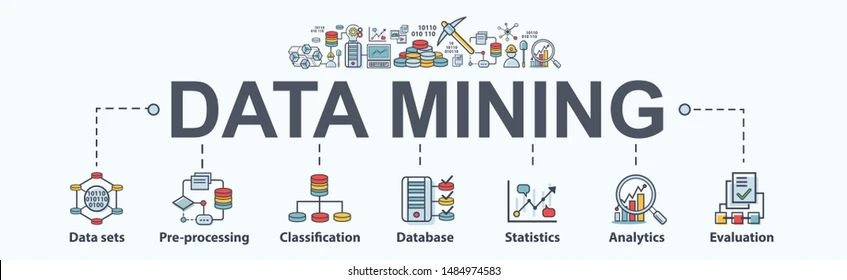

#**การคัดเลือกตัวแบบ**

##KNN

In [82]:
from sklearn.model_selection import train_test_split 
from sklearn import datasets

> โดยจะกำหนดแบ่ง train กับ test โดย test size = 0.2 

In [83]:
X = Data.iloc[:,1:4] #กำหนดค่า X โดยให้เอาทุกแถว ตั้งแต่คอลัมที่ 2 ถึง 5
y = Data[['total']] #กำหนดค่า y โดยให้เอาทุกแถว 
# train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y)
# train-validation
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

##**Train Model**

>  Import

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

>  Define นิยามโมเดล

In [85]:
KNN_1=KNeighborsClassifier(n_neighbors=4) #n_neighbors คือ จำนวนเพื่อนบ้านที่จะพิจารณา

> Train เพื่อสร้างโมเดล

In [86]:
KNN_1.fit(X_train , y_train)
 #input มี2ตัว คือ X และ y 
#โดยใช้น้ำหนักแต่ละจุดเท่ากัน

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

>**Test** ใช้คำสั่ง .predict โดยที่ข้อมูลมากจาก X_test

In [87]:
KNN_1.predict(X_test) #โดยใช้ predict ทำนายว่าตัวที่ใกล้สุด 3 ตัวแรก คือ 2

array([0, 0, 1, 0, 0, 0])

ใช้คำสั่ง .predict_proba เป็นการคำนวณความน่าจะเป็นว่า จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพที่นำเข้าโมเดลนั้นจะอยู่กลุ่มไหนของปริมาณการนำเข้าสินค้าทางการเกษตรกี่เปอร์เซ็นต์

In [88]:
KNN_1.predict_proba(X_test)

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ]])

##**การวัดผลของตัวแบบ KNN**

ตรวจสอบความแม่นยำของโมเดล ว่าสามารถจำแนกกลุ่มปริมาณการนำเข้าสินค้าทางการเกษตร ว่าอยู่กลุ่มมาก กลุ่มน้อย ได้ที่ความแม่นยำกี่เปอร์เซ็นต์

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cross_val_score(KNN_1, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.625

>**สรุปได้ว่า** จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 62.50% เมื่อใช้โมเดล KNN

#**Desition Tree**

>**Import**

In [91]:
from sklearn.tree import DecisionTreeClassifier

>**Define**

In [92]:
myTree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
#criterion คือ default เป็น ‘gini’ ซึ่งเราสามารถจะเลือกเป็น ‘entropy’ 
#max_depth ความลึกของ tree หรือจำนวน level ที่มากที่สุด ของ node ที่จะทำการ split

>**Train**

In [93]:
myTree.fit(X_train,y_train) #กำหนดขอบเขตของข้อมูล

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

>**Test**

In [94]:
y_pred = myTree.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0])

>**Draw Tree**

In [95]:
from sklearn.tree import plot_tree

[Text(200.88000000000002, 181.2, 'X[1] <= 1817.0\nentropy = 0.999\nsamples = 23\nvalue = [12, 11]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 1004.5\nentropy = 0.993\nsamples = 20\nvalue = [9, 11]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

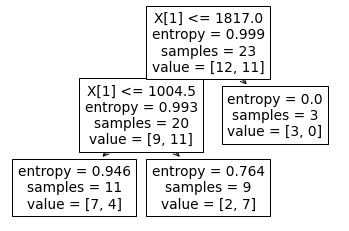

In [96]:
plot_tree(myTree)

##**การวัดผลของตัวแบบ Disition tree**

>**Evaluation**

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
cross_val_score(myTree, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)


0.4583333333333333

>**สรุปได้ว่า** จำนวนประชากร รายได้เฉลี่ย ค่าครองชีพโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 41.67% เมื่อใช้โมเดล Decision Tree

#**Random Forest**

In [99]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier(random_state=1)
skRF.fit(X_train,y_train)
skRF.score(X,y)
y_predrf = skRF.predict(X_test)
y_predrf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0, 1, 0, 0, 0])

##**การวัดผลของตัวแบบ Random Forest**

In [100]:
cross_val_score(skRF, X_train, y_train, cv=12).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.375

สรุปได้ว่า จำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรว่าแต่ละประเทศจัดอยู่ในกลุ่มมากหรือน้อยได้ ด้วยความแม่นยำ 41.67% เมื่อใช้โมเดล RF

**จากการทำทั้งสามโมเดลการทำนายพบว่ จำนวนประชากร รายได้ ค่าครองชีพ มีผลต่อการนำเข้าสินค้าทางการเกษตรว่าแต่ละประเทศจัดอยู่ในกลุ่มมากหรือน้อยได้ ที่มีความความแม่นยำมากที่สุด 2 โมเดลจากทั้งสามโมเดลคือ KNN และ RF โดยมีความแม่นยำ 62.50% เท่ากัน**

#**Visualization**
ของผลการวัดของแต่ละโมเดล

##**วัดผลเปรียบเทียบความแม่นยำ**

In [101]:
import numpy as np


labels = ['KNN', 'Desition Tree', 'RF']
cross_val_score = [62.50, 54.16, 62.50]

No handles with labels found to put in legend.


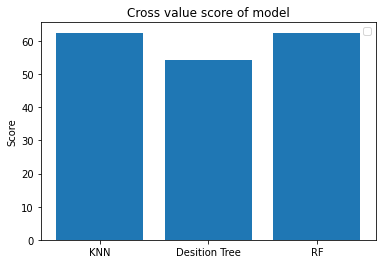

In [102]:
width = 0.35  #ขนาดของแท่ง

plt.bar([0,1,2],cross_val_score)
plt.ylabel('Score')
plt.title('Cross value score of model')
plt.xticks([0,1,2],labels)
plt.legend();
plt.show()

>**เราจะเห็นว่าโมเดล KNN และ Random Forest มีความแม่นยำเท่ากัน**

##**ดูความสัมพันธ์ของปัจจัย**

**แสดงข้อมูลที่จะทำการวิเคราะห์**

In [103]:
Data

,total,population(million),living expenses(USD),avg income(USD)
0,0,34.220,952.0,4754.0
1,0,1400.000,752.0,884.0
2,1,51.000,1154.0,2738.0
3,0,2.000,1856.0,4684.0
4,0,30.000,652.0,882.0
5,1,146.000,424.0,891.0
6,1,4.207,1326.0,3024.0
7,0,93.000,449.0,250.0
8,0,5.390,2074.0,6521.0
9,0,36.280,1701.0,3620.0


In [104]:
np.arange(len(Data.iloc[:,:]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

> **graph 1 **

## **จำนวนการนำเข้าสินค้ากับจำนวนประชากร**

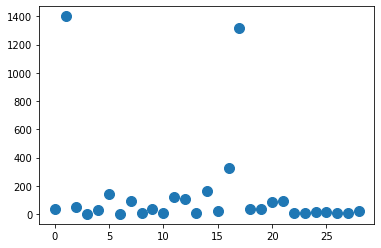

In [105]:
plt.scatter(range(len(Data.iloc[:,1])),Data.iloc[:,1],s=100)
plt.show()

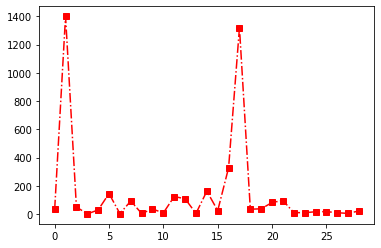

In [106]:
plt.plot(range(len(Data.iloc[:,1])),Data.iloc[:,1],'s-.r')
plt.show()

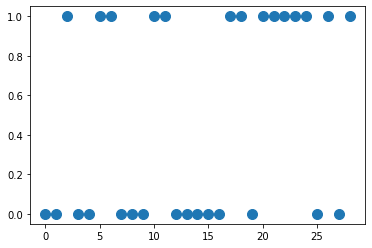

In [107]:
plt.scatter(range(len(Data['population(million)'])),Data['total'],s=100)
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า จำนวนการนำเข้าสินค้ากับจำนวนประชากรมีความสัมพันธ์กัน โดย ถ้าเรามองภาพแบ่งสเกลเอ็ก จะเห็นได้ว่า 1 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนมาก ส่วนใหญ่จะมีประชากรน้อย และ 0 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนน้อยส่วนใหญ่จะมีประชากรมาก หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับจำนวนประชากรมีความสัมพันธ์ไปในทิศทางตรงกันข้ามกัน**

>**graph 2**

###**จำนวนการนำเข้าสินค้าทางเกษตรกับจำนวนค่าครองชีพ**

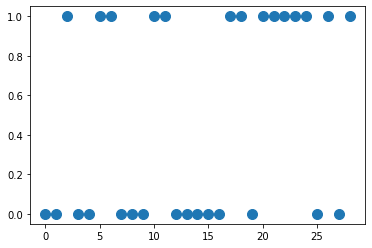

In [108]:
plt.scatter(range(len(Data['living expenses(USD)'])),Data['total'],s=100)
plt.show()

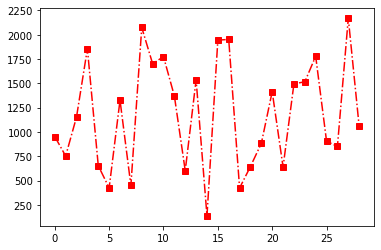

In [109]:
plt.plot(range(len(Data.iloc[:,-2])),Data.iloc[:,-2],'s-.r')
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า จำนวนการนำเข้าสินค้ากับค่าครองชีพมีความสัมพันธ์กัน โดย ถ้าเรามองภาพแบ่งสเกลเอ็ก จะเห็นได้ว่า 1 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนมาก ส่วนใหญ่จะมีค่าครองชีพน้อย และ 0 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนน้อยส่วนใหญ่จะมีค่าครองชีพมาก หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับค่าครองชีพมีความสัมพันะธ์ไปในทิศทางตรงกันข้ามกัน**

>**graph 3**

###**จำนวนการนำเข้าสินค้าทางเกษตรกับรายได้เฉลี่ย**

In [110]:
Data.iloc[:,3]

0     4754.0
1      884.0
2     2738.0
3     4684.0
4      882.0
5      891.0
6     3024.0
7      250.0
8     6521.0
9     3620.0
10    3589.0
11    3465.0
12     286.0
13    4135.0
14     168.0
15    4283.0
16    5493.0
17     158.0
18     248.0
19     342.0
20    3915.0
21     222.0
22    1638.0
23    4483.0
24    4418.0
25    1123.0
26    1052.0
27    4577.0
28    2542.0
Name: avg income(USD), dtype: float64

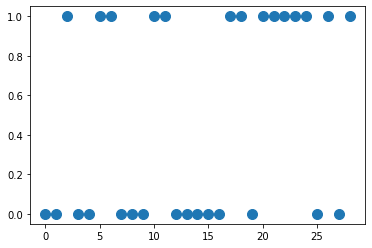

In [111]:
plt.scatter(range(len(Data['avg income(USD)'])),Data['total'],s=100)
plt.show()

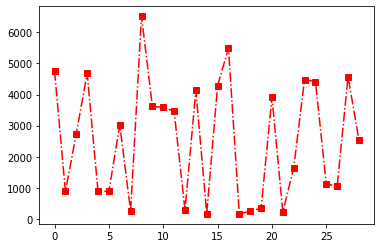

In [112]:
plt.plot(range(len(Data.iloc[:,3])),Data.iloc[:,3],'s-.r')
plt.show()

**จากกราฟจะสามารถสรุปผลได้ว่า จำนวนการนำเข้าสินค้ากับรายได้เฉลี่ยมีความสัมพันธ์กัน โดย ถ้าเรามองภาพแบ่งสเกลเอ็ก จะเห็นได้ว่า 1 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนมาก ส่วนใหญ่จะมีรายได้เฉลี่ยมาก และ 0 ที่แทนปริมาณการนำเข้าสินค้าทางการเกษตรจำนวนน้อยส่วนใหญ่จะมีรายได้เฉลี่ยน้อย หรือกล่าวได้ว่า ปริมาณการนำเข้าสินค้าทางการเกษตรกับค่าครองชีพมีความสัมพันะธ์ไปในทิศทางเดียวกัน**

##**แก้กราฟ**

In [113]:
merged_04

,id_x,country,View_x,population(million),religion,capital,language,living expenses(USD),avg income(USD),id_y,Title,Subtitle_PD,Unit,View_y,Freq,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019_x,Y2020_x,Unnamed: 20,id_x,Title_x,Subtitle_FC,Unit_x,View_x,Freq_x,Y2006_x,Y2007_x,Y2008_x,Y2009_x,Y2010_x,Y2011_x,Y2012_x,Y2013_x,Y2014_x,Y2015_x,Y2016_x,Y2017_x,Y2018_x,id_y,Title_y,Subtitle_PC,Unit_y,View_y,Freq_y,Y2006_y,Y2007_y,Y2008_y,Y2009_y,Y2010_y,Y2011_y,Y2012_y,Y2013_y,Y2014_y,Y2015_y,Y2016_y,Y2017_y,Y2018_y,Y2019_y,Y2020_y,PD_total,PC_total,FC_total,total
0,1,SAUDI ARABIA,ประเทศ,34.22,อิสลาม,ริยาด,อาหรับ,952,"4,754",1,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,SAUDI ARABIA,กิโลกรัม,ประเทศ,รายปี,"2,249,315.00","2,143,682.00","1,192,758.30","1,829,041.50","1,867,354.50","1,404,900.00","1,891,636.00","1,794,707.00","1,848,395.00","2,074,101.00","2,773,214.60","2,789,352.25","2,249,075.00","1,893,065.00",NaN,1.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"582,636.00","787,997.00","672,800.00","1,007,240.00","858,295.00","869,573.00","1,050,904.00","1,008,322.00","1,051,742.00","999,195.06","1,058,661.00","1,180,532.00",927324.755,1.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,SAUDI ARABIA,เมตริกตัน,ประเทศ,รายปี,"4,910.26","6,203.20","6,274.60","4,090.01","4,427.09","1,961.45","2,980.24","6,262.60","5,689.41","3,091.60","8,182.42","8,778.60","3,060.24","6,909.40","6,849.32","2,249,315.002,143,682.001,192,758.301,829,041....","3,060.246,909.406,849.32",927324.755,"927324.7552,249,315.002,143,682.001,192,758.30..."
1,2,CHINA,ประเทศ,"1,400",พุทธ,ปักกิ่ง,จีนกลาง,752,884,2,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,CHINA,กิโลกรัม,ประเทศ,รายปี,"1,160,075.00","1,519,815.00","782,375.00","794,125.00","736,610.00","4,517.00","222,750.00","775,000.00","610,500.00","524,056.80","270,000.00","353,631.00","373,507.00",625150.9077,NaN,2.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,CHINA,เมตริกตัน,ประเทศ,รายปี,"270,060.53","675,840.83","569,348.49","427,921.66","723,621.87","728,466.14","610,452.25","472,653.78","746,048.64","708,995.53","865,728.91","949,696.61",645736.27,2.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,CHINA,เมตริกตัน,ประเทศ,รายปี,"124,916.36","46,686.16","47,946.76","5,675.89","6,870.47","9,738.47","3,796.07","6,479.97","4,689.86","3,568.08","37,890.50","44,373.90","5,544.60","3,023.29","3,460.13","1,160,075.001,519,815.00782,375.00794,125.0073...","5,544.603,023.293,460.13",645736.27,"645736.271,160,075.001,519,815.00782,375.00794..."
2,3,KOREA REPUBLIC OF,ประเทศ,51,ไม่นับถือ,โซล,เกาหลี,"1,154","2,738",3,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,KOREA REPUBLIC OF,กิโลกรัม,ประเทศ,รายปี,"1,875,370.00","1,724,557.00","1,332,152.90","1,002,940.60","1,778,427.60","763,273.50","1,201,126.00","1,347,522.00","1,503,846.00","1,750,676.64","2,392,512.50","1,974,102.84","2,274,394.04","2,501,570.96",NaN,3.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"426,401.90","472,745.91","287,250.00","417,478.50","435,164.70","528,138.20","443,139.60","425,380.00","358,277.95","303,010.00","276,959.51","335,142.27",392424.045,3.0,ปริมาณการนำเข้าเมล็ดพันธุ์ควบคุม,KOREA REPUBLIC OF,เมตริกตัน,ประเทศ,รายปี,"35,847","59,459.38","165,267.43","12,467.58","259,375.78","356,372.62","682,724.86","738,370.00","756,349.34","379,566.84","893,000.00","90,000.00","27,000.00","68,787.67","10,469.92","1,875,370.001,724,557.001,332,152.901,002,940....","27,000.0068,787.6710,469.92",392424.045,"392424.0451,875,370.001,724,557.001,332,152.90..."
3,4,QATAR,ประเทศ,2,อิสลาม,โดฮา,อาหรับ,"1,856","4,684",4,สารป้องกันและกำจัดโรคพืชที่มีปริมาณการนำเข้าสูง,QATAR,กิโลกรัม,ประเทศ,รายปี,"647,240.00","890,090.00","665,440.00","673,721.00","742,418.00","732,970.00","783,931.00","1,465,079.00","2,444,760.00","1,472,750.00","3,733,675.00","5,940,771.00","6,381,231.75","2,592,601.20",NaN,4.0,ปริมาณการนำเข้าปุ๋ยเคมีรายประเทศ,QATAR,เมตริกตัน,ประเทศ,รายปี,"268,274.00","445,726.00","460,968.00","387,572.71","380,881.23

In [114]:
data1

,country,total,C_Agicult
0,SAUDI ARABIA,"927324.7552,249,315.002,143,682.001,192,758.30...",0
1,CHINA,"645736.271,160,075.001,519,815.00782,375.00794...",0
2,KOREA REPUBLIC OF,"392424.0451,875,370.001,724,557.001,332,152.90...",1
3,QATAR,"434565.1042647,240.00890,090.00665,440.00673,7...",0
4,MALAYSIA,"252642.6558709,000.00512,800.00420,400.00708,0...",0
5,RUSSIAN FEDERATION (CIS),"596639.4825101,198.00120,678.00194,505.00392,6...",1
6,KUWAIT,"75,065.4028,790.0029,875.00160,147.20267,567.2...",1
7,EGYPT,"4,292.37327,000.00313,200.00149,603.00294,000....",0
8,NORWAY,"195,650.6035,776.00427,341.00152,960.00455,887...",0
9,CANADA,"247490.3583193,252.00268,944.00273,904.00190,1...",0


In [115]:
data_new1 = merged_04[['country','population(million)','living expenses(USD)','avg income(USD)','total']]
data_new1

,country,population(million),living expenses(USD),avg income(USD),total
0,SAUDI ARABIA,34.22,952,"4,754","927324.7552,249,315.002,143,682.001,192,758.30..."
1,CHINA,"1,400",752,884,"645736.271,160,075.001,519,815.00782,375.00794..."
2,KOREA REPUBLIC OF,51,"1,154","2,738","392424.0451,875,370.001,724,557.001,332,152.90..."
3,QATAR,2,"1,856","4,684","434565.1042647,240.00890,090.00665,440.00673,7..."
4,MALAYSIA,30,652,882,"252642.6558709,000.00512,800.00420,400.00708,0..."
5,RUSSIAN FEDERATION (CIS),146,424,891,"596639.4825101,198.00120,678.00194,505.00392,6..."
6,KUWAIT,4.207,"1,326","3,024","75,065.4028,790.0029,875.00160,147.20267,567.2..."
7,EGYPT,93,449,250,"4,292.37327,000.00313,200.00149,603.00294,000...."
8,NORWAY,5.39,"2,074","6,521","195,650.6035,776.00427,341.00152,960.00455,887..."
9,CANADA,36.28,"1,701","3,620","247490.3583193,252.00268,944.00273,904.00190,1..."


In [128]:
data_new1 = data_new1.dropna()
data_new1

,country,population(million),living expenses(USD),avg income(USD),total
0,SAUDI ARABIA,34.22,952,"4,754","927324.7552,249,315.002,143,682.001,192,758.30..."
1,CHINA,"1,400",752,884,"645736.271,160,075.001,519,815.00782,375.00794..."
2,KOREA REPUBLIC OF,51,"1,154","2,738","392424.0451,875,370.001,724,557.001,332,152.90..."
3,QATAR,2,"1,856","4,684","434565.1042647,240.00890,090.00665,440.00673,7..."
4,MALAYSIA,30,652,882,"252642.6558709,000.00512,800.00420,400.00708,0..."
5,RUSSIAN FEDERATION (CIS),146,424,891,"596639.4825101,198.00120,678.00194,505.00392,6..."
6,KUWAIT,4.207,"1,326","3,024","75,065.4028,790.0029,875.00160,147.20267,567.2..."
7,EGYPT,93,449,250,"4,292.37327,000.00313,200.00149,603.00294,000...."
8,NORWAY,5.39,"2,074","6,521","195,650.6035,776.00427,341.00152,960.00455,887..."
9,CANADA,36.28,"1,701","3,620","247490.3583193,252.00268,944.00273,904.00190,1..."


In [129]:
import numpy as np

In [130]:
data_new1['total(M^5)'] = data_new1[{'total'/1000000**5}]
data_new1

TypeError: ignored

In [123]:
removes = data_new1.shape[0] - data_new1.dropna().shape[0]
print(f'size before drop = {data_new1.shape[0]}')
print(f'size after drop = {data_new1.dropna().shape[0]}')
 #จากการคำนวณพบว่ามีข้อมูลที่หายไป 3 แถว

size before drop = 29
size after drop = 29


In [122]:
data_new1.isnull().any()
#จะเห็นว่าไม่มีค่า Missing แล้ว

country                 False
population(million)     False
living expenses(USD)    False
avg income(USD)         False
total                   False
dtype: bool

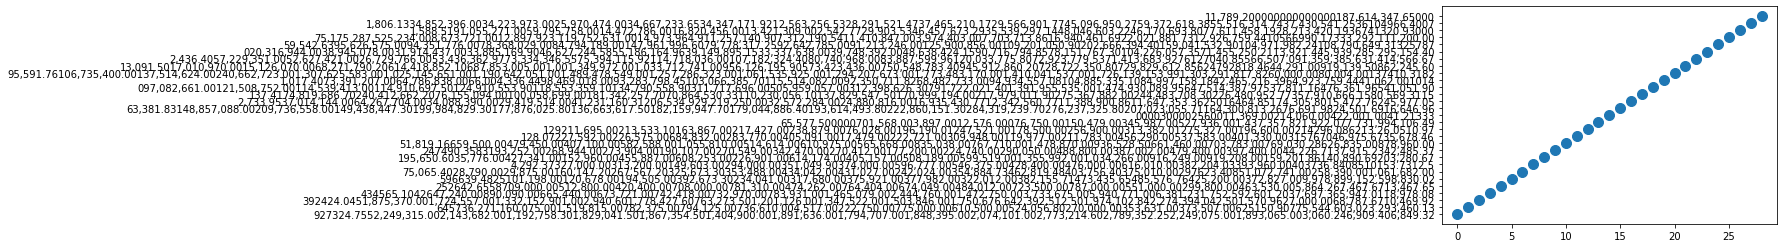

In [125]:
plt.scatter(range(len(data_new1['avg income(USD)'])),data_new1['total'],s=100)
plt.show()

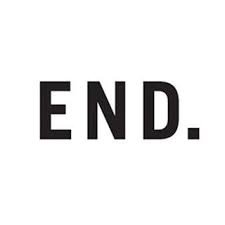

##จบโปรเจคนาตาชา